# DATA ANALYSIS OF GOOGLE APP'S RATINGS

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#getting data

df=pd.read_csv('GoogleAppStoreDataSet.csv')

### Exploring Features

- App
- Category
- Rating
- Installs
- Price
- Content Rating

In [4]:
df.head()

,App,Category,Rating,Installs,Price,Content Rating
0,Ai illustrator viewer,ART_AND_DESIGN,3.4,"100,000+",0,Everyone
1,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,"5,000+",0,Everyone
2,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.0,"1,000+",0,Everyone
3,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,"10,000,000+",0,Everyone
4,Cardi B Wallpaper,ART_AND_DESIGN,4.8,"50,000+",0,Everyone


In [4]:
df.shape

(1796, 6)

In [5]:
df.describe()

,Rating
count,1708.000000
mean,4.210363
std,0.473817
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1796 non-null   object 
 1   Category        1796 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1796 non-null   object 
 4   Price           1796 non-null   object 
 5   Content Rating  1796 non-null   object 
dtypes: float64(1), object(5)
memory usage: 84.3+ KB


In [7]:
df.isnull().sum()

App                0
Category           0
Rating            88
Installs           0
Price              0
Content Rating     0
dtype: int64

## Data Cleaning

#### Rating

In [6]:
df['Rating'].isnull().sum()

88

In [7]:
#taking only 'Rating' not null rows into dataframe

df = df[df['Rating'].notna()]


In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Installs          0
Price             0
Content Rating    0
dtype: int64

In [10]:
df.shape

(1708, 6)

#### Installs

In [9]:
df['Installs'].value_counts()

1,000,000+        335
10,000,000+       245
100,000+          214
10,000+           150
5,000,000+        144
500,000+          100
1,000+             99
100,000,000+       95
50,000+            89
5,000+             75
50,000,000+        57
100+               36
500+               36
500,000,000+       18
1,000,000,000+     15
Name: Installs, dtype: int64

In [11]:
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))

In [12]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',',''))

In [13]:
df['Installs'].value_counts()

1000000       335
10000000      245
100000        214
10000         150
5000000       144
500000        100
1000           99
100000000      95
50000          89
5000           75
50000000       57
500            36
100            36
500000000      18
1000000000     15
Name: Installs, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1708 non-null   object 
 1   Category        1708 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1708 non-null   object 
 4   Price           1708 non-null   object 
 5   Content Rating  1708 non-null   object 
dtypes: float64(1), object(5)
memory usage: 93.4+ KB


In [15]:
df['Installs']=pd.to_numeric(df['Installs'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1708 non-null   object 
 1   Category        1708 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1708 non-null   int64  
 4   Price           1708 non-null   object 
 5   Content Rating  1708 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.4+ KB


#### Price

In [17]:
df['Price']=df['Price'].apply(lambda x: x.strip('$'))


In [18]:
df['Price']=pd.to_numeric(df['Price'])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1708 non-null   object 
 1   Category        1708 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1708 non-null   int64  
 4   Price           1708 non-null   float64
 5   Content Rating  1708 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 93.4+ KB


### Exploratory Data Analysis

In [20]:
df.describe()

,Rating,Installs,Price
count,1708.000000,1.708000e+03,1708.000000
mean,4.210363,2.337989e+07,0.263759
std,0.473817,1.073932e+08,1.682448
min,1.000000,1.000000e+02,0.000000
25%,4.000000,5.000000e+04,0.000000
50%,4.300000,1.000000e+06,0.000000
75%,4.500000,1.000000e+07,0.000000
max,5.000000,1.000000e+09,39.990000


In [21]:
#finding mean
df.mean()

Rating      4.210363e+00
Installs    2.337989e+07
Price       2.637588e-01
dtype: float64

In [22]:
#finding median
df.median()

Rating            4.3
Installs    1000000.0
Price             0.0
dtype: float64

In [23]:
#finding mode
df.mode()

,App,Category,Rating,Installs,Price,Content Rating
0,"Cardiac diagnosis (heart rate, arrhythmia)",FAMILY,4.4,1000000.0,0.0,Everyone
1,ROBLOX,NaN,NaN,NaN,NaN,NaN


In [24]:
#finding kurtosis
df.kurtosis()

Rating        6.413741
Installs     61.424869
Price       230.136725
dtype: float64

In [25]:
#finding skewness on columns
df.skew(axis = 0)

Rating      -1.906738
Installs     7.552619
Price       12.711100
dtype: float64

#### 'Rating' is Left Skewed or Negatively Skewed and its median value is 4.3.  Kurtosis is around 6.4 for 'Rating' that means data is above normal distribution, which also means it has large outliers. 'Installs' is Positive Skewed with median value 10,00,000 and Kurtosis is around 61.4. 'Price' is also Positive Skewed with Kurtosis around 230. 

In [26]:
print("Number of Apps with 5 ratings : ",df.Rating[df['Rating'] == 5 ].count())

Number of Apps with 5 ratings :  24


#### There are 24 Apps in the store which has 5.0 Ratings.

In [27]:
print("The most costly App in the Store is : ",df.App[df.Price == df.Price.max()])

The most costly App in the Store is :  1057    LTC AS Legal
Name: App, dtype: object


#### The most costly App in the Store is : LTC AS Legal costing $39.99.

Text(0, 0.5, 'Number of Apps')

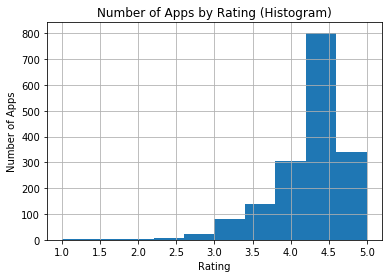

In [28]:
df['Rating'].hist()
plt.title('Number of Apps by Rating (Histogram)',color = 'black')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')

Text(0, 0.5, 'Frequency')

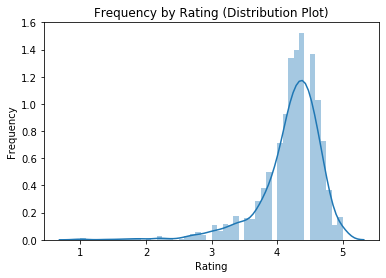

In [29]:
sns.distplot(df.Rating)
plt.title('Frequency by Rating (Distribution Plot)',color = 'black')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Rating has negatively skewed data with mode value of 4.3

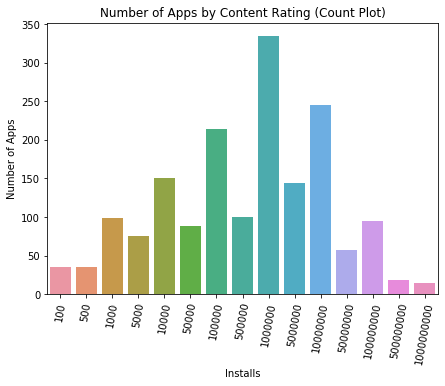

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Installs')
plt.xticks(rotation=80)
plt.title('Number of Apps by Content Rating (Count Plot)',color = 'black')
plt.xlabel('Installs')
plt.ylabel('Number of Apps')
plt.show()

#### The Installs category of 1,000,000+ has the highest number of apps, whereas, the Installs category of 1,000,000,000+ has the lowest number of apps.

Text(0, 0.5, 'Frequency')

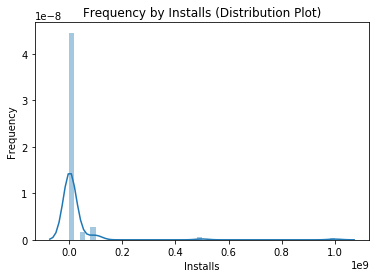

In [31]:
sns.distplot(df.Installs)
plt.title('Frequency by Installs (Distribution Plot)',color = 'black')
plt.xlabel('Installs')
plt.ylabel('Frequency')

#### Installs has positively skewed data.

In [32]:
df['Content Rating'].unique()


array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+'], dtype=object)

In [33]:
df['Content Rating'].value_counts()

Everyone        1374
Teen             196
Mature 17+        81
Everyone 10+      57
Name: Content Rating, dtype: int64

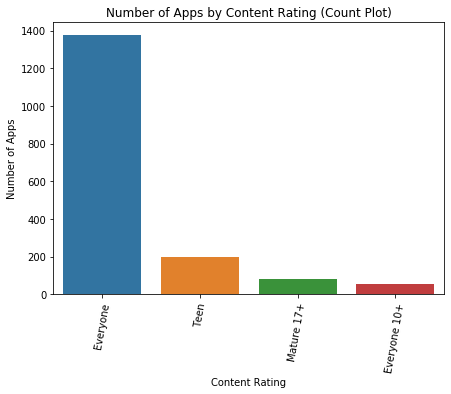

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Number of Apps by Content Rating (Count Plot)',color = 'black')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

Text(0.5, 1.0, 'Share of % of Content Rating (Pie Chart)')

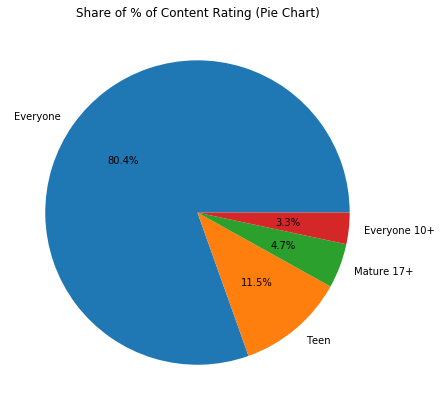

In [35]:
plt.figure(figsize=(12,7))
label=['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+']
plt.pie(df['Content Rating'].value_counts(), labels=label, autopct='%1.1f%%')
plt.title('Share of % of Content Rating (Pie Chart)',color = 'black')

#### Content Rating category 'EVERYONE' has the maximum share percentage of around 80.4%, whereas, Content Rating category 'EVERYONE 10+'  has the least share percentage of 3.3%. Number of apps under 'EVERYONE' is 1374.

Text(0.5, 0, 'Number of Apps')

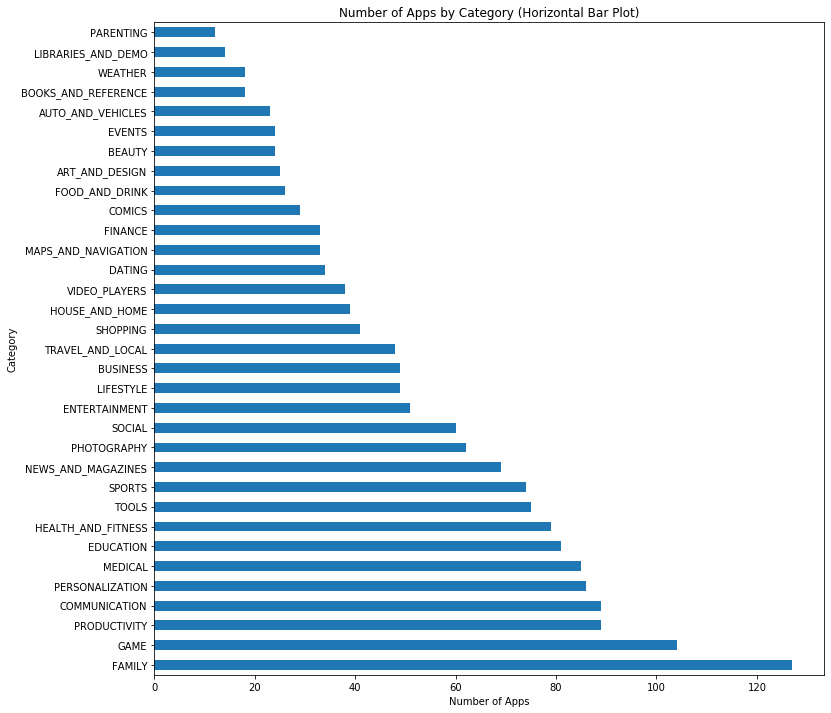

In [36]:
df['Category'].value_counts().plot(kind='barh',figsize= (12,12))
plt.title('Number of Apps by Category (Horizontal Bar Plot)',color = 'black')
plt.ylabel('Category')
plt.xlabel('Number of Apps')

#### The horizontal bar plot shows that the maximum number of apps belong to the Family Category, followed by Game category. The least number of apps belong to the Parenting category.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

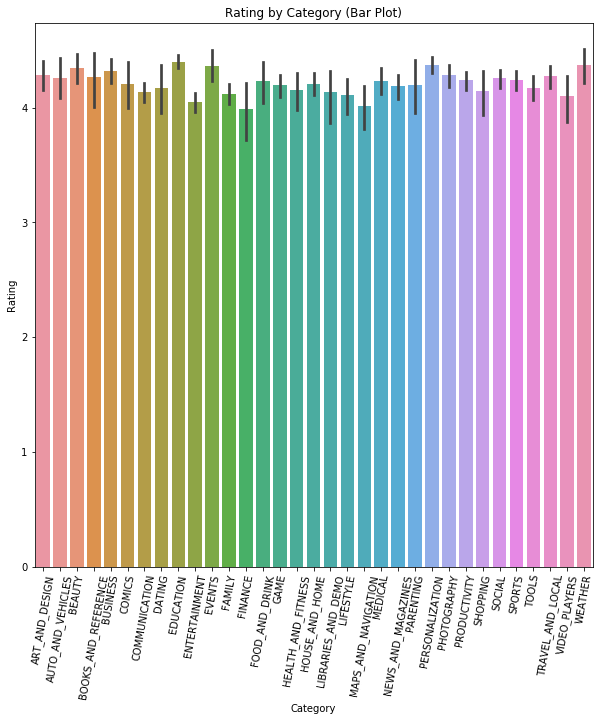

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x='Category', y='Rating', data=df)
plt.title('Rating by Category (Bar Plot)',color = 'black')
plt.xticks(rotation=80)


#### 'EDUCATION' category has the highest mean rating followed by 'WEATHER' and 'PERSONALIZATION' categories. Meanwhile, 'FINANCE' category has the lowest mean rating.

Text(0.5, 1.0, 'Rating by Content Rating (Box Plot)')

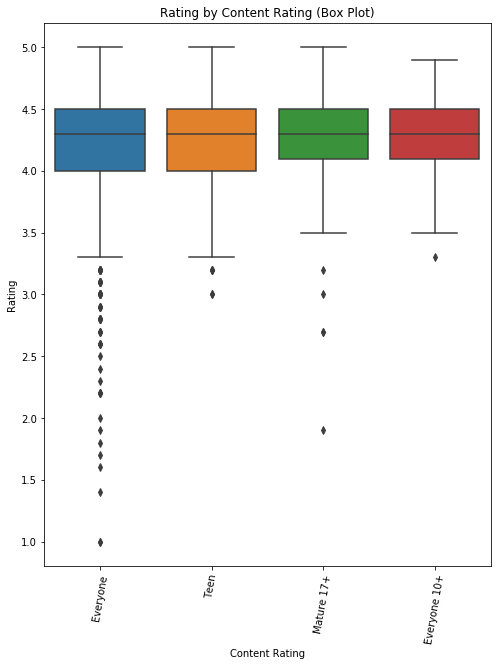

In [39]:
plt.figure(figsize=(8,10))
plt.tight_layout()
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.xticks(rotation=80)
plt.title('Rating by Content Rating (Box Plot)',color = 'black')

#### Inter quartile range for Everyone and Teen categories is greater than Mature 17+ and Everyone 10+ categories. It means Everyone and Teen has more dispersed data.

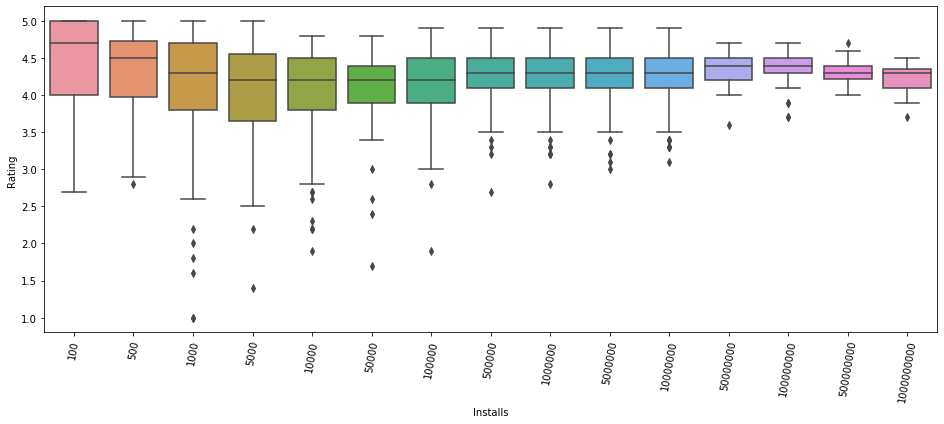

In [40]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Installs',y='Rating',data=df)
plt.xticks(rotation=80)
f.set_size_inches(16,6)

#### The apps in the category of 100+ installs has the highest rating median value.